# Plotting av TEM bildedata

Målet med denne Jupyter Notebooken er at dere skal bli litt kjent med HyperSpy, og hvordan dere kan både åpne og visualisere TEM data. Disse er vanligvis i DM3-formatet, hvor HyperSpy kan lese både dataen og metadataen.

Denne kunnskapen blir nyttig i neste Notebook, hvor dere skal prosessere mer avansert data: STEM - Differential Phase Constrast (DPC) og Scanning Electron Diffraction (SED). I tillegg skal HyperSpy sin spektroskopi-funksjonalitet brukes i neste øving, til å analysere data fram SEMen.

## Blackboard levering

Fra denne Jupyter Notebooken skal dere levere både bildefil og HTML-versjon av Jupyter Notebooken dere brukte til å lage bildefilen. HTML-filen må være i en ZIP-fil.

Eksempel på hvordan bildet kan se ut, med skala-indikator, "høy-kontrast" tekst, og litt annoteringer. Merk at dere skal ikke bruke akkurat de annoteringene: bildet er bare en indikator for hvordan denne typen figurer burde se ut.

<img src="eksempelbilde.jpg" width=300 height=300 />

Merk at dere skal OGSÅ levere bildefil og HTML-versjon av Jupyter Notebooken for enten STEM-DPC eller SED: se de andre Notebooken (02 og 03) for mer informasjon om dette.

## Importere plotte-bibliotek og `hyperspy`

Først må plotte-biblioteket defineres, med `%matplotlib qt`, eller `%matplotlib widget`. Jeg anbefaler `%matplotlib qt`. Av og til så virker den ikke, i dette tilfellet, bruk `widget`.

In [2]:
%matplotlib qt

Så importer `hyperspy.api` som `hs`.

Dere kommer til  få en `WARNING:hyperspy_gui_...`. Denne kan ignoreres.

In [3]:
import hyperspy.api as hs

## Åpne dataset

Dette gjøres via `hs.load`, som kan åpne en rekke dataformater, spesielt innenfor elektronmikroskopi. Lag et objekt som heter `s`.

Tips: sjekk docstring for informasjon om hvordan `hs.load` virker.

In [7]:
s = hs.load('lowmagx1500_overfocused_ hull.dm3')

Dette lager et `Signal2D` objekt, som inneholder mange forskjellige funksjoner.

En av disse er en plotte-funksjon, som visualiserer dataene.

Bruk `plot` funksjonen, som er en del av `s` objektet. Hvis du har brukt `%matplotlib qt` så åpnes dette som et eget vindu, hvis du bruker `%matplotlib widget` så kommer plottet rett i notebooken.

In [8]:
s.plot()

Dette er et interaktivt plot. Merk at dataene er automatisk kalibrert, ved at det er en scalebar med enten nano eller mikrometer.

I tillegg kan kontrasten endres med kontrast editoren: trykk på bildet, og så trykk på `H` knappen. Merk at dette bare virker med `%matplotlib qt`. Hvis du må bruke `%matplotlib widget`, så kan dette endres med `s.plot(vmin=0, vmax=1000)`.

## `Signal2D` strukturen

Denne måten å jobbe med data er veldig praktisk, siden funksjonene finnes i data-objektet (signalet).

Selve dataene er en NumPy array.

Skriv `s.data`, og kjør cellen.

In [9]:
s.data

array([[358, 340, 339, ..., 305, 295, 283],
       [350, 363, 329, ..., 287, 273, 252],
       [376, 370, 351, ..., 299, 249, 254],
       ...,
       [335, 359, 327, ..., 339, 319, 310],
       [341, 333, 297, ..., 340, 343, 317],
       [338, 362, 344, ..., 326, 307, 331]])

Her kan vi se alle tall-verdiene til dataene i plottet vi så tidligere.

Men dette er bare selve dataene, metadatanene sånn som kablibrering er i `s.axes_manager`. Prøv dette.

In [10]:
s.axes_manager

Signal axis name,size,offset,scale,units
x,2048,-0.0,0.006823909934610128,µm
y,2048,-0.0,0.006823909934610128,µm


Disse tallene er vanligvis riktige, men alltid sjekk at de ser rimlige ut! For "standard" moduser så pleier de å være greie, men f.eks. i STEM-DPC data så er mest sannsylig feil. Den vanligste måten å sjekke disse kablibreringene, er via objekter med kjente størrelser. For eksempel størrelsen på "vinduene", eller hvis man har atomæroppløsning så kan man bruke atomgitteret.

Andre metadata finner dere i `s.metadata`. Prøv dette

In [11]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── acquisition_mode = TEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── magnification = 1500.0
│       └── microscope = 2100F
├── General
│   ├── authors = Emil Christiansen
│   ├── date = 2021-09-23
│   ├── original_filename = lowmagx1500_overfocused_ hull.dm3
│   ├── time = 18:47:13
│   └── title = lowmagx1500_overfocused_ hull
├── Sample
│   └── description = TEDPELLA673_500nmGrid
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = False
    ├── quantity = Intensity
    └── signal_type =

Her finner man informasjon om mikroskopet, sånn som akselerasjonspenning. Informasjon om prøven er ting man vanligvis må manuelt skrive inn, så denne informasjon er ganske ofte feil.

For å se ALL metadataen i DM3-filen: `s.original_metadata`. Vanligvis trenger vi ikke å se på denne, men det er fint å vite hva slags informasjon som er lagret i filene, slik at vi ikke trenger å skrive det ned.
￼


In [12]:
s.original_metadata

├── ApplicationBounds = (0, 0, 920, 1596)
├── DocumentObjectList
│   └── TagGroup0
│       ├── AnnotationGroupList
│       │   └── TagGroup0
│       │       ├── AnnotationType = 31
│       │       ├── BackgroundColor = (0, 0, 0)
│       │       ├── BackgroundMode = 1
│       │       ├── FillMode = 1
│       │       ├── Font
│       │       │   ├── Attributes = 7
│       │       │   ├── FamilyName = Lucida Console
│       │       │   └── Size = 59
│       │       ├── ForegroundColor = (-1, -1, -1)
│       │       ├── HasBackground = 1
│       │       ├── IsMoveable = 1
│       │       ├── IsResizable = 1
│       │       ├── IsSelectable = 1
│       │       ├── IsTranslatable = 1
│       │       ├── IsVisible = 1
│       │       ├── ObjectTags
│       │       ├── Rectangle = (1768.0, 128.0, 1920.0, 1088.0)
│       │       ├── TextOffsetH = 1.0
│       │       ├── TextOffsetV = 1.0
│       │       ├── TextWidth = 334.3673400878906
│       │       └── UniqueID = 9
│       ├── AnnotationType = 20
│       ├── BackgroundColor = (0, 0, 0)
│       ├── BackgroundMode = 2
│       ├── FillMode = 1
│       ├── ForegroundColor = (-1, 0, 0)
│       ├── HasBackground = 0
│       ├── ImageDisplayInfo
│       │   ├── BrightColor = (-1, -1, -1)
│       │   ├── Brightness = 0.5
│       │   ├── CLUT <list>
│       │   │   ╠══ [0] = (0, 0, 0)
│       │   │   ╠══ [1] = (257, 257, 257)
│       │   │   ╠══ [10] = (2570, 2570, 2570)
│       │   │   ╠══ [100] = (25700, 25700, 25700)
│       │   │   ╠══ [101] = (25957, 25957, 25957)
│       │   │   ╠══ [102] = (26214, 26214, 26214)
│       │   │   ╠══ [103] = (26471, 26471, 26471)
│       │   │   ╠══ [104] = (26728, 26728, 26728)
│       │   │   ╠══ [105] = (26985, 26985, 26985)
│       │   │   ╠══ [106] = (27242, 27242, 27242)
│       │   │   ╠══ [107] = (27499, 27499, 27499)
│       │   │   ╠══ [108] = (27756, 27756, 27756)
│       │   │   ╠══ [109] = (28013, 28013, 28013)
│       │   │   ╠══ [11] = (2827, 2827, 2827)
│       │   │   ╠══ [110] = (28270, 28270, 28270)
│       │   │   ╠══ [111] = (28527, 28527, 28527)
│       │   │   ╠══ [112] = (28784, 28784, 28784)
│       │   │   ╠══ [113] = (29041, 29041, 29041)
│       │   │   ╠══ [114] = (29298, 29298, 29298)
│       │   │   ╠══ [115] = (29555, 29555, 29555)
│       │   │   ╠══ [116] = (29812, 29812, 29812)
│       │   │   ╠══ [117] = (30069, 30069, 30069)
│       │   │   ╠══ [118] = (30326, 30326, 30326)
│       │   │   ╠══ [119] = (30583, 30583, 30583)
│       │   │   ╠══ [12] = (3084, 3084, 3084)
│       │   │   ╠══ [120] = (30840, 30840, 30840)
│       │   │   ╠══ [121] = (31097, 31097, 31097)
│       │   │   ╠══ [122] = (31354, 31354, 31354)
│       │   │   ╠══ [123] = (31611, 31611, 31611)
│       │   │   ╠══ [124] = (31868, 31868, 31868)
│       │   │   ╠══ [125] = (32125, 32125, 32125)
│       │   │   ╠══ [126] = (32382, 32382, 32382)
│       │   │   ╠══ [127] = (32639, 32639, 32639)
│       │   │   ╠══ [128] = (-32640, -32640, -32640)
│       │   │   ╠══ [129] = (-32383, -32383, -32383)
│       │   │   ╠══ [13] = (3341, 3341, 3341)
│       │   │   ╠══ [130] = (-32126, -32126, -32126)
│       │   │   ╠══ [131] = (-31869, -31869, -31869)
│       │   │   ╠══ [132] = (-31612, -31612, -31612)
│       │   │   ╠══ [133] = (-31355, -31355, -31355)
│       │   │   ╠══ [134] = (-31098, -31098, -31098)
│       │   │   ╠══ [135] = (-30841, -30841, -30841)
│       │   │   ╠══ [136] = (-30584, -30584, -30584)
│       │   │   ╠══ [137] = (-30327, -30327, -30327)
│       │   │   ╠══ [138] = (-30070, -30070, -30070)
│       │   │   ╠══ [139] = (-29813, -29813, -29813)
│       │   │   ╠══ [14] = (3598, 3598, 3598)
│       │   │   ╠══ [140] = (-29556, -29556, -29556)
│       │   │   ╠══ [141] = (-29299, -29299, -29299)
│       │   │   ╠══ [142] = (-29042, -29042, -29042)
│       │   │   ╠══ [143] = (-28785, -28785, -28785)
│       │   │   ╠══ [144] = (-28528, -28528, -28528)
│       │   │   ╠══ [145] = (-28271, -28271, -28271)
│       │   │   ╠══ [146] = (-2

## Plotting av data

Laging av bildefiler er veldig likt som for FIB-bildene, men det er et par triks.

Først importer `matplotlib.pyplot` som `plt`, og lag en `fig` og `ax` via `plt.subplots`.

In [13]:
import matplotlib.pyplot as plt

In [14]:
fig, ax = plt.subplots()

Deretter bruk `imshow` i `ax`, med `s.data` som bildedata, og `s.axes_manager.signal_extent` som `extent`.

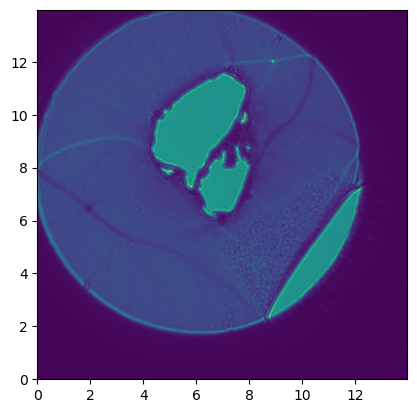

In [16]:
ax.imshow(s.data, extent=s.axes_manager.signal_extent)
fig

Så kan man bruke akkurat de samme plotte-funksjonene som med FIB-dataene.

### Endre på kontrast: `clim`

Et vanlig problem i denne type data er store forskjeller i intensitet i bildet. Ergo at det er veldig lyse og veldig mørke området, som gjør det vanskelig å se detaljene man er interessert i.

En løsning på dette er å lagre `AxesImage` som en variabel (`cax = ax.imshow(.....)`, og bruke `set_clim` funksjonen i `cax`.

Tips
- Bruk `get_clim` for å se hva de automatiske verdiene er, og bruk disse som et utgangspunkt
- Sjekk docstring til `set_clim` for å se hvordan den virker (`Shift` + `Tab`)

In [21]:
AxesImage = ax.imshow(s.data, extent=s.axes_manager.signal_extent)

In [22]:
AxesImage.get_clim()

(21, 24683)

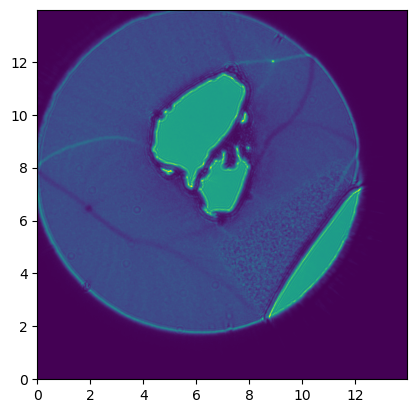

In [27]:
AxesImage.set_clim(vmin=500 , vmax=22000)
fig

In [33]:
s2 = hs.load('lowmagx2000_frenel_-5.7mm_tosirkler.dm3')
s2.plot()

In [34]:
s3 = hs.load('lowmagx2000_frenel underfoc treringer.dm3')
s3.plot()

In [11]:
s4 = hs.load('stem_20k_spot0.2nm_cameralength40cm_bf.dm3')
s4.plot()

In [35]:
fig_min, axarr = plt.subplots(1, 2, sharey=True)

In [37]:
ax_0 = axarr[0]
ax_1 = axarr[1]

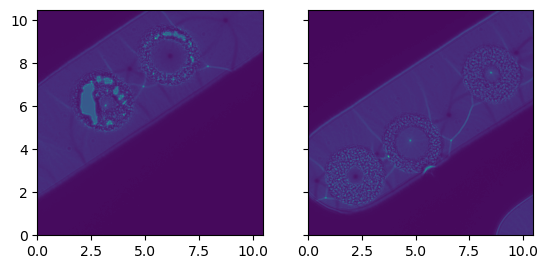

In [40]:
ax_0.imshow(s2.data, extent=s2.axes_manager.signal_extent)
ax_1.imshow(s3.data, extent=s3.axes_manager.signal_extent)
fig_min

# TEM-data-figur

Bruk dette i tillegg til kunnskapen fra FIB-øvingen til å lage en bildefil med TEM-data, gjerne en dere tenker å bruke i labrapporten.

Denne skal ha samme "format" som FIB-bildet:

- Inneholde et eller flere bilder
- Ha scalebar
- Noen annoteringer

# Neste Jupyter Notebook: STEM-DPC eller SED

Nå som dere kan basisen av hvordan HyperSpy virker, så fortsett med enten `02_STEM_DPC...` eller `03_scanning_electron_diffraction_...` notebooken. Dere skal bare levere en av disse på blackboard, men hvis dere har begge datatypene fra TEM-laben så anbefaler jeg å gå igjennom begge.